# HW02
EE 538 Spring 2020 <br>
Analog Circuits for Sensor Systems <br>
University of Washington Electrical & Computer Engineering <br>

Due: April 18, 2020 <br>
Author: Kevin Egedy

In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import ltspice
import sympy as sp
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def read_ltspice_tran(file_name):
    cols = []
    arrs = []
    with open(file_name, 'r',encoding='utf-8') as data:
        for i,line in enumerate(data):
            if i==0:
                cols = line.split()
                arrs = [[] for _ in cols]
                continue
            parts = line.split()
            for j,part in enumerate(parts):
                arrs[j].append(part)
    df = pd.DataFrame(arrs,dtype='float64')
    df = df.T
    df.columns = cols
    return df

<img src="images/HW02Q1.png" width="700">

**Part A**

Given: <br>
$f_{3\text{dB,HP}} = 10\text{Hz}$ and $V_B = 1V$.

Solve

$\begin{eqnarray}
& f_{3\text{dB}} &=& \frac{1}{2\pi RC} \\
& 10\text{Hz}    &=& \frac{1}{2\pi R_{\text{eq}}C} \Bigg|_{C=1\text{pF}} \\
& R_{\text{eq}}  &=& R_{B_2}//R_{B_1} = 15915 \Omega \\
\text{and} \\
& V_{\text{out}} &=& V_{\text{in}}\frac{R_{2}}{R_{1}+R_{2}} \\
& V_b            &=& V_{\text{in}}\frac{R_{B_2}}{R_{B_1}+R_{B_2}} \\
& 1              &=& 5 \frac{R_{B_2}}{R_{B_1}+R_{B_2}} \\
\text{then} \\
&                && R_{B_2} = 19893, R_{B_1} = 79572 
\end{eqnarray}$

<hr>

**Part B**

Find $\frac{v_{\text{out}}}{v_B}$

$\begin{eqnarray}
& I_E &&=&& \beta I_B     &&=&& \frac{V_E}{R_E}   \\
& I_C &&=&& (\beta +1)I_B &&=&& \frac{V_{CC}-V_{\text{out}}}{R_C} \\
& V_E &&=&& V_B - 0.6     &&\approx&& V_S - 0.6 \\
& I_E &&\approx&& I_C     &&&& \text{for }\beta >= 100 & \text{then } \\
& \frac{V_S-0.6}{R_E} &&=&& \frac{V_{CC}}{V_{\text{out}}} \\
& V_{\text{out}} &&=&& V_{CC} - \frac{R_C}{R_E}(V_S-0.6)  \\
& V_{\text{out}} &&=&& -\frac{R_C}{R_E}V_S +V_{DC}
\end{eqnarray}$

Given $V_B = 1\text{V}$ and $I_C = 1\text{mA}$, solve

$\begin{eqnarray}
& V_{\text{out}} &&=&& V_{CC} - \frac{R_C}{R_E}(V_S-0.6) \\
& V_{\text{out}} &&=&& 5-10\cdot(1-0.6)          \\
& V_{\text{out}} &&=&& 1\text{V} \\
\text{And} \\
& I_C            &&=&& \frac{V_{CC}-V_{\text{out}}}{R_C} \\
& 1\text{mA}     &&=&& \frac{5-1}{R_C} \\
\text{then} \\
& R_C            &&=&& 4k\Omega, R_E = 400\Omega
\end{eqnarray}$

Find $V_{CE}$

$V_C = V_{\text{out}} = 1$ and $V_E = 1 - 0.6 = 0.4$ so $V_{CE} = 0.6$.

<hr>

**Part C**

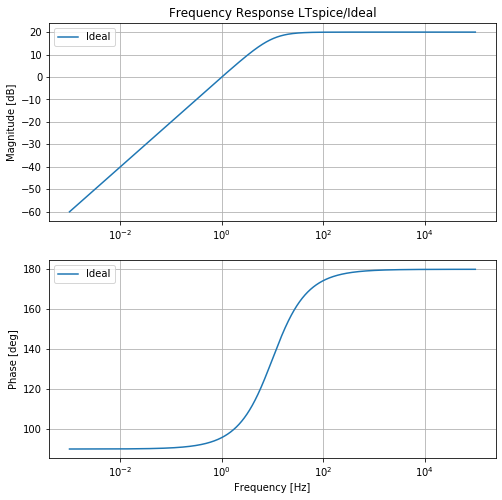

In [3]:
f1 = np.linspace(1e-3,1e2,100000)
f2 = np.linspace(1e2,1e5,100000)
f = np.concatenate((f1,f2))
w = 2*np.pi*f
s = 1j*w
R = 15915
C = 1e-6
tau = R*C
Vout_Vb = -10            # R_C/R_E
Vb_Vin = s*tau/(s*tau+1)
H = Vb_Vin * Vout_Vb

# Plot the frequency response
fig, axs = plt.subplots(2,figsize=(8,8))
axs[0].set_title('Frequency Response LTspice/Ideal')
axs[0].semilogx(f, 20*np.log10(abs(H)),label='Ideal')
axs[0].set_ylabel('Magnitude [dB]')
axs[0].grid()
axs[0].legend()

axs[1].semilogx(f, -np.angle(H,deg=True),label='Ideal')
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].grid()
axs[1].legend()
plt.show();

**Part D**
<img src="images/ltspiceQ1.png" width="500">

       
|          | |             | |   |
|----------|-|-------------|-|---|
| V(ve)    | | 0.177253      | | voltage  |
| V(vcc)   | | 5             | | voltage  |
| V(vout)  | | 3.24502       | | voltage  |
| V(vb)    | | 0.930176      | | voltage  |
| V(vin)   | | 0             | | voltage  |
| Ic(Q1)   | | 0.000438746   | | device_current  |
| Ib(Q1)   | | 4.38746e-06   | | device_current  |
| Ie(Q1)   | | -0.000443134  | | device_current  |
| I(C)     | | 9.30176e-19   | | device_current  |
| I(Rb2)   | | 4.6759e-05    | | device_current  |
| I(Rb1)   | | 5.11464e-05   | | device_current  |
| I(Rc)    | | 0.000438746   | | device_current  |
| I(Re)    | | 0.000443133   | | device_current  |
| I(Vin)   | | 9.30176e-19   | | device_current  |
| I(Vcc)   | | -0.000489892  | | device_current  |

The DC operating point has key differences from the quick calculations.

| Simulated Results      | | Calculated Results   |
|------------------------|-|----------------------|
| $V_{\text{out}}=3.24$V | | $V_{\text{out}}=1$V  |
| $V_{\text{BE}}=0.75$V  | | $V_{\text{BE}}=0.6$V |
| $V_{\text{B}}=0.93$V   | | $V_{\text{B}}=1$V    |
| $I_C = 438\mu$A        | | $I_C = 1$mA          |


In [4]:
filepath = 'data/common_emitter.txt'
df = read_ltspice_tran(filepath)
df['Vout_Mag'] = df['V(vout)'].apply(lambda x: x.split(',')[0])
df['Vout_Mag'] = df['Vout_Mag'].apply(lambda x: x[1:-2])
df['Vout_Mag'] = df['Vout_Mag'].astype('float64')
df['Vout_Phase'] = df['V(vout)'].apply(lambda x: x.split(',')[1])
df['Vout_Phase'] = df['Vout_Phase'].apply(lambda x: x[1:-2])
df['Vout_Phase'] = df['Vout_Phase'].astype('float64')
df['Freq.'] = df['Freq.'].astype('float64')
df = df[df['Freq.']<=1e5]

/home/kegedy/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


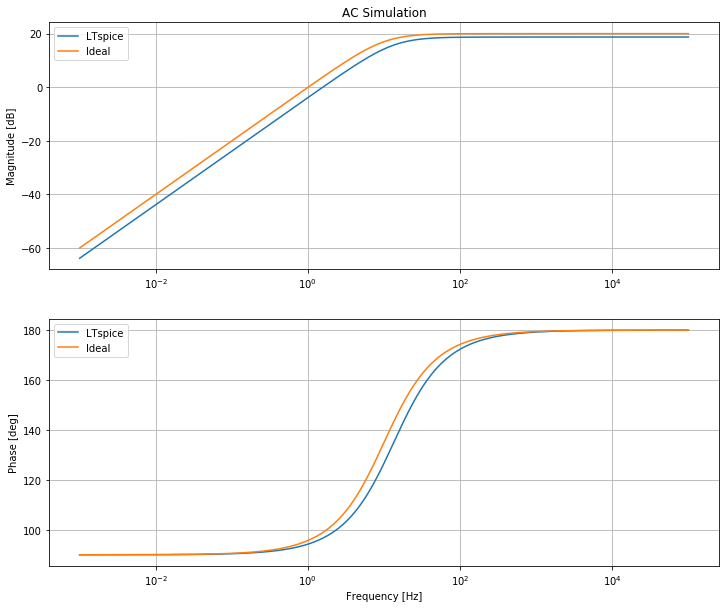

In [5]:
fig, axs = plt.subplots(2,figsize=(12,10))
freq = df['Freq.']
mag = df['Vout_Mag']
ang = df['Vout_Phase']

axs[0].set_title('AC Simulation')
axs[0].semilogx(freq, mag, label='LTspice')
axs[0].semilogx(f, 20*np.log10(abs(H)),label='Ideal')
axs[0].set_ylabel('Magnitude [dB]')
axs[0].grid()
axs[0].legend()
axs[1].semilogx(freq, ang, label='LTspice')
axs[1].semilogx(f, -np.angle(H,deg=True),label='Ideal')
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].grid()
axs[1].legend()
plt.show();

The AC analysis for the simplified calculation and simulation  are very similar. 

In [6]:
filepath = 'data/common_emitter_trans.txt'
df = read_ltspice_tran(filepath)
print(f'Gain is {round((max(df["V(vout)"])-min(df["V(vout)"]))/(max(df["V(vin)"])-min(df["V(vin)"])),4)}')

Gain is 8.6501


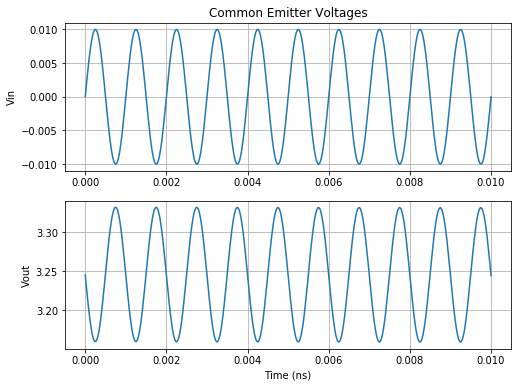

In [7]:
fig, axs = plt.subplots(2,figsize=(8,6))
axs[0].set_title('Common Emitter Voltages')
axs[0].plot(df['time'], df['V(vin)'],label='Vin')
axs[0].set_ylabel('Vin')
axs[0].grid()
#xs[0].legend()
axs[1].plot(df['time'], df['V(vout)'],label='Vout')
axs[1].set_ylabel('Vout')
axs[1].set_xlabel('Time (ns)')
axs[1].grid()
#xs[1].legend()
plt.show();

<img src="images/HW02Q2.png" width="700">

**Part A**

Small signal analysis: <br>
$\begin{eqnarray}
V_{\text{out}} = V_{\text{out,DC}} + v_{\text{out}} = V_{\text{out,DC}} + A_v v_{\text{in}}
\end{eqnarray}$

Ebers-Moll Model: <br>
$\begin{eqnarray}
& I_C    &&=&& I_S(T)(e^{\frac{V_{BE}}{V_T}}-1)        &&\approx&& I_Se^{\frac{V_{BE}}{V_T}} \Bigg|_{V_T = \frac{kT}{q}=25.3\text{mV}} \\
& V_{BE} &&=&& \frac{kT}{q}\ln{(\frac{I_C}{I_S(T)}+1)} &&\approx&& \frac{kT}{q}\ln{(\frac{I_C}{I_S})} \\
& V_{BE} &&=&& 25.3\cdot10^{-3} \cdot \ln{(\frac{1\cdot10^{-3}}{10^{-16}})}  &&=&& 0.757V
\end{eqnarray}$

Solve: <br>
$\begin{eqnarray}
& I_C &=& \beta I_B \Bigg|_{I_C = 10^{-3}, \beta = 100} &\rightarrow& I_B = 10^{-5} \\
& I_E &=& (\beta +1)I_B \\
& V_{\text{out}} &=& I_E \cdot R_E \Bigg|_{V_{\text{out}} = 1}
&\rightarrow& R_E = 990 \\
& V_{\text{in}} &=& V_{\text{out}} + V_{BE} &=& 1.757\text{V} 
\end{eqnarray}$

<hr>

**Part B**

$\begin{eqnarray}
& i_e           &=& \frac{v_e}{R_E} &=& \frac{v_{\text{test}}}{R_E} \\
& i_{\text{test}} &=& \frac{i_e}{\beta +1} &=& 
\frac{v_{\text{test}}}{R_E(\beta +1)} \\
& r_{\text{in}} &=& \frac{v_{\text{test}}}{i_{\text{test}}} &=& R_E(\beta +1) \Bigg|_{R_E = 990} &=& 99990 \Omega
\end{eqnarray}$

<hr>

**Part C**

$\begin{eqnarray}
& i_e  &=& -i_{\text{test}} \\
& v_{\text{test}} &=& i_e\cdot R_E\\
& r_{\text{out}}  &=& \frac{v_{\text{test}}}{i_{\text{test}}} &=& R_E &=& 990\Omega
\end{eqnarray}$

<hr>

<img src="images/ltspiceQ2.png" width="400">

**DC Operating Point**

|          | |               | |   |
|---------:|-|---------------|-|---|
| V(vout)  | | 0.983204      | | voltage  |
| V(vcc)   | | 5             | | voltage  |
| V(vb)    | | 1.757         | | voltage  |
| Ic(Q1)   | | 0.000983307   | | device_current  |
| Ib(Q1)   | | 9.83307e-06   | | device_current  |
| Ie(Q1)   | | -0.00099314   | | device_current  |
| I(Re)    | | 0.000993135   | | device_current  |
| I(Vin)   | | -9.83302e-06  | | device_current  |
| I(Vcc)   | | -0.000983302  | | device_current  |


The DC Operating point closes reflects the calculations from Ebers-Moll model. The simulated value of $I_C = 0.98$mA is very close to the design of 1mA. Also simulated $V_{\text{out}} = 0.98$ is very close to 1V. 

**AC Simulation for Rin**

In [8]:
filepath = 'data/emitter_follower_rin.txt'
df = read_ltspice_tran(filepath)
df['Rin'] = df['1/Ib(Q1)'].apply(lambda x: x.split(',')[0])
df['Rin'] = df['Rin'].astype('float64')
df['Freq.'] = df['Freq.'].astype('float64')
print(f'Rout is {round(max(df["Rin"]),2)}')

Rout is 102620.39


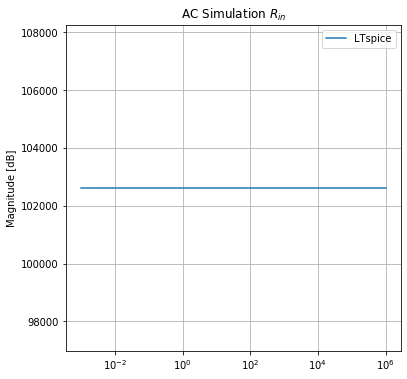

In [9]:
fig, ax = plt.subplots(1,figsize=(6,6))
freq = df['Freq.']
mag = df['Rin']

ax.set_title(r'AC Simulation $R_{in}$')
ax.semilogx(freq, mag, label='LTspice')
ax.set_ylabel('Magnitude [dB]')
ax.grid()
ax.legend()
plt.show();

The difference betweeen $R_{\text{in}}$ calculations and the simulation is $\frac{(102620.39 - 99990)}{99990} = 2.6\%$.

**AC Simulation for Rout**

In [10]:
filepath = 'data/emitter_follower_rout.txt'
df = read_ltspice_tran(filepath)
df['Rout'] = df['1/Ie(Q1)'].apply(lambda x: x.split(',')[0])
df['Rout'] = df['Rout'].astype('float64')
df['Freq.'] = df['Freq.'].astype('float64')
print(f'Rout is {round(-max(df["Rout"]),2)}')

Rout is 1016.04


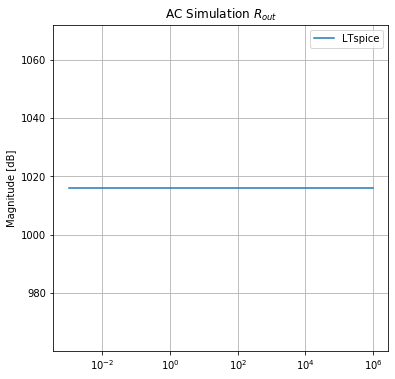

In [11]:
fig, ax = plt.subplots(1,figsize=(6,6))
freq = df['Freq.']
mag = -df['Rout']

ax.set_title(r'AC Simulation $R_{out}$')
ax.semilogx(freq, mag, label='LTspice')
ax.set_ylabel('Magnitude [dB]')
ax.grid()
ax.legend()
plt.show();

The difference betweeen $R_{\text{out}}$ calculations and the simulation is $\frac{(1016.04 - 990)}{990} = 2.6\%$